In [96]:
import torch
import random
from pointnet import PointNet
from dataloader import ModelNet40Dataset
import matplotlib.pyplot as plt

In [97]:
data_dir = '../data/modelnet40_hdf5_2048'
num_points = 2048
test_dataset = ModelNet40Dataset(data_dir=data_dir, split='test', num_points=num_points)

In [98]:
total_samples = len(test_dataset)
sample_idx = random.randint(0, total_samples - 1)
point_cloud, label = test_dataset[sample_idx]

In [99]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
npf = 64
model = PointNet(npf).to(device)
model_path = '../model/model.pt'
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

PointNet(
  (stn): STN3D(
    (conv1): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
    (conv2): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
    (conv3): Conv1d(128, 1024, kernel_size=(1,), stride=(1,))
    (fc1): Linear(in_features=1024, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=9, bias=True)
    (relu): ReLU()
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv1): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
  (conv2): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (conv

In [100]:
points = torch.tensor(point_cloud, dtype=torch.float32).unsqueeze(0)
points = points.transpose(2, 1).to(device)
with torch.no_grad():
    outputs = model(points)
    _, predicted = torch.max(outputs.data, 1)
    predicted_class = predicted.item()

In [101]:
class_files = "../data/modelnet40_hdf5_2048/shape_names.txt"

with open(class_files, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

print(class_names)

['airplane', 'bathtub', 'bed', 'bench', 'bookshelf', 'bottle', 'bowl', 'car', 'chair', 'cone', 'cup', 'curtain', 'desk', 'door', 'dresser', 'flower_pot', 'glass_box', 'guitar', 'keyboard', 'lamp', 'laptop', 'mantel', 'monitor', 'night_stand', 'person', 'piano', 'plant', 'radio', 'range_hood', 'sink', 'sofa', 'stairs', 'stool', 'table', 'tent', 'toilet', 'tv_stand', 'vase', 'wardrobe', 'xbox']


In [102]:
print(f'Real class index: {label} Name: {class_names[label]}')
print(f'Predicted class index: {predicted_class} Name: {class_names[predicted_class]}')

Real class index: 33 Name: table
Predicted class index: 33 Name: table


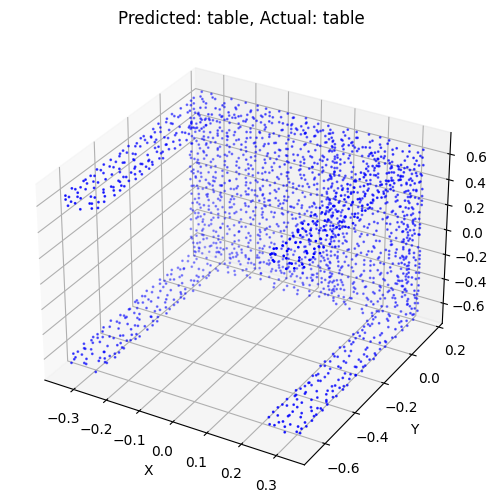

In [103]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

point_cloud_np = point_cloud

ax.scatter(
    point_cloud_np[:, 0],
    point_cloud_np[:, 1],
    point_cloud_np[:, 2],
    c='b', marker='o', s=1
)

ax.set_title(f'Predicted: {class_names[predicted_class]}, Actual: {class_names[label]}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig('../test.png')

plt.show()